# Image Preprocessing
The original images and annotations can be found in Nextcloud: https://nextcloud.scc.kit.edu/s/4zMGFmXq5KPZJcg?path=%2F

In [4]:
import sys
sys.path.insert(0,'..')  # add project root to PATH

In [5]:
import pathlib
import copy

In [6]:
from src.preprocessing import JSONUtil, preprocess_images, fix_annotation_keys
from src.annotated_image import AnnotatedImage

## 1. Preprocess images
### 1.1 Set Parameters

In [7]:
# define input and output path for images
input_path = "../data/"
output_path = "../_data"

In [8]:
# define size of scaled image (image input size for CNN)
width, height = 416, 416

# Set this variable to True to convert all images to grayscale images
convert_to_grayscale = False
# for preprocessing with histogram equalization set this variable to True
should_equalize_histogram = False
# for preprocessing with thresholding set this variable to True
thresholding = False
# Set to True to keep the aspect ratio and pad the image to the required size
keep_aspect_ratio= False

### 1.2 Merge .json files

In [9]:
original_annotations = JSONUtil.merge_jsons(input_path)
original_annotations = fix_annotation_keys(original_annotations)

### 1.3 Loop through all images
Load from input path, preprocess and store to output path. 

In [10]:
annotations = copy.deepcopy(original_annotations)
annotations = preprocess_images(input_path, output_path, width, height, annotations, 
                                convert_to_grayscale, should_equalize_histogram, 
                                thresholding, keep_aspect_ratio)

In [11]:
# dump all labeling information into master .json file
annotation_output = pathlib.Path(output_path, "Master.json")
JSONUtil.write(annotation_output, annotations)

## 2. Check Results
Display the processed images and the bounding boxes to check if the preprocessing was successful.
### Load the images:

In [12]:
images = {image_file.name: AnnotatedImage(image_path=image_file, annotation_path=annotation_output)
          for image_file in pathlib.Path(output_path).glob('*.jpg')
          if image_file.name in annotations}
keys = list(images.keys())

### Select and index/key of the image to check

In [13]:
index = 5
key = keys[index]

### Display the corresponding entry in the JSON annotations

In [14]:
annotations[key]

{'filename': 'ail_006_kiw.jpg',
 'size': 387531,
 'regions': [{'shape_attributes': {'name': 'rect',
    'x': 213,
    'y': 116,
    'width': 59,
    'height': 119},
   'region_attributes': {'Objects': 'Kiwi'}}],
 'file_attributes': {}}

### Display the image with the bounding boxes

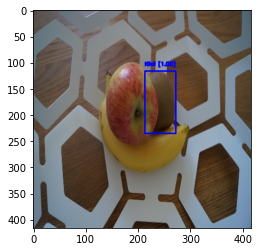

In [15]:
images[key].show()